<a href="https://colab.research.google.com/github/RegiTelma/NLP/blob/main/Genism_with_word_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -nc "https://archive.org/stream/OneHundredYearsOfSolitude_201710/One_Hundred_Years_of_Solitude_djvu.txt"

--2023-08-09 09:27:27--  https://archive.org/stream/OneHundredYearsOfSolitude_201710/One_Hundred_Years_of_Solitude_djvu.txt
Resolving archive.org (archive.org)... 207.241.224.2
Connecting to archive.org (archive.org)|207.241.224.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘One_Hundred_Years_of_Solitude_djvu.txt’

One_Hundred_Years_o     [  <=>               ] 949.97K  2.84MB/s    in 0.3s    

2023-08-09 09:27:27 (2.84 MB/s) - ‘One_Hundred_Years_of_Solitude_djvu.txt’ saved [972765]



In [ ]:
!ls

One_Hundred_Years_of_Solitude_djvu.txt	sample_data


In [ ]:
import os
import logging
import os
import multiprocessing
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')
import numpy as np
import seaborn as sns
from scipy import spatial
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from gensim.test.utils import datapath
from gensim import utils

class MyCorpus:
    """An iterator that yields sentences (lists of str)."""

    def __init__(self):
        self.lines = []

        files = os.listdir(".")
        files = [file for file in files if file.endswith(".txt")]
        print(f"Found {len(files)} files")

        for file in files:
            for line in open(file):
                self.lines += [line]
        print(f"Got {len(self.lines)} lines.")

    def __iter__(self):
        for line in self.lines:
            preprocessed_line = utils.simple_preprocess(line)
            yield preprocessed_line

In [ ]:
import gensim.models

sentences = MyCorpus()

model = gensim.models.Word2Vec(
    sentences=sentences,
    sg=1,
    vector_size=300,
    window=20,
    min_count=3,
    workers=multiprocessing.cpu_count(),
    epochs=15
)

print("Done.")

Found 1 files
Got 13919 lines.
Done.


In [ ]:
model.wv.most_similar("solitude", topn=20)

[('gabriel', 0.8082705736160278),
 ('marques', 0.8052237033843994),
 ('garcia', 0.7975504994392395),
 ('trivial', 0.7785913944244385),
 ('happenings', 0.7208943963050842),
 ('measureless', 0.7134185433387756),
 ('disturb', 0.708000123500824),
 ('revels', 0.7020992636680603),
 ('decrepitude', 0.6955198049545288),
 ('sought', 0.6908686757087708),
 ('disenchantment', 0.6866547465324402),
 ('contest', 0.6843149662017822),
 ('curse', 0.6776480078697205),
 ('privileges', 0.6773238182067871),
 ('hundred', 0.6755867004394531),
 ('remaining', 0.6715806126594543),
 ('clairvoyance', 0.6705532073974609),
 ('inactivity', 0.6686275005340576),
 ('annoyance', 0.6673845052719116),
 ('charity', 0.6662793159484863)]

In [ ]:
model.wv.most_similar("time", topn=20)

[('end', 0.8622424006462097),
 ('moment', 0.8577942848205566),
 ('fact', 0.8550593256950378),
 ('first', 0.8499305248260498),
 ('certainty', 0.8427854180335999),
 ('wait', 0.8417838215827942),
 ('idea', 0.841370701789856),
 ('times', 0.8393445611000061),
 ('definite', 0.8382256627082825),
 ('conceived', 0.837878942489624),
 ('fortune', 0.8360973000526428),
 ('short', 0.8354571461677551),
 ('convinced', 0.8340526223182678),
 ('gaston', 0.8316736221313477),
 ('realized', 0.8312021493911743),
 ('words', 0.8303587436676025),
 ('obvious', 0.8301904201507568),
 ('however', 0.8299676179885864),
 ('instant', 0.8299326300621033),
 ('everything', 0.829916775226593)]

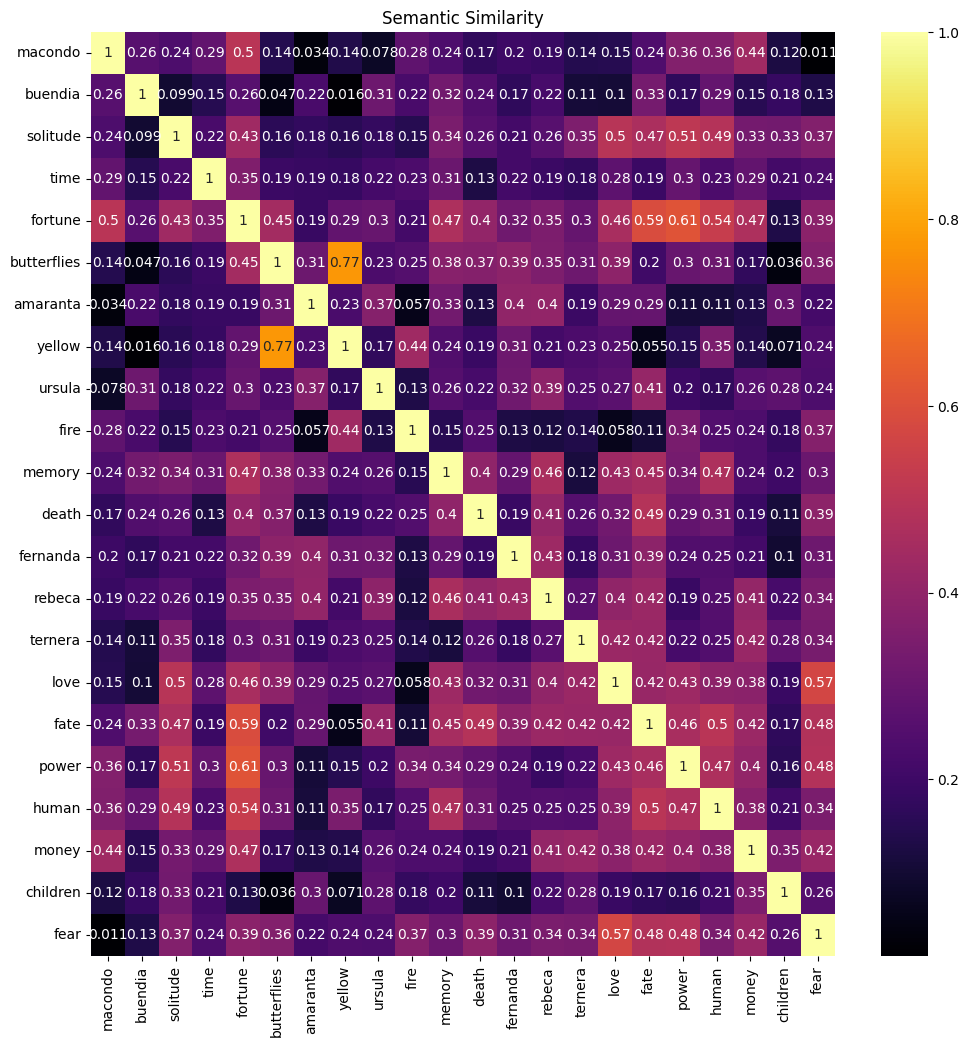

In [ ]:
def plot_similarities(words):
    features = [np.array(model.wv[word]) for word in words]

    similarities = np.zeros((len(features), len(features)))
    for index1, feature1 in enumerate(features):
        for index2, feature2 in enumerate(features):
            similarities[index1, index2] = 1 - spatial.distance.cosine(feature1, feature2)

    fig, ax = plt.subplots(figsize=(12, 12))
    g = sns.heatmap(
        similarities,
        annot=True,
        xticklabels=words,
        yticklabels=words,
        cmap="inferno"
    )
    g.set_xticklabels(words, rotation=90)
    g.set_yticklabels(words, rotation=0)
    g.set_title("Semantic Similarity")

words = [
    "macondo",
    "buendia",
    "solitude",
    "time",
    "fortune",
    "butterflies",
    "amaranta",
    "yellow",
    "ursula",
    "fire",
    "memory",
    "death",
    "fernanda",
    "rebeca",
    "ternera",
    "love",
    "fate",
    "power",
    "human",
    "money",
    "children",
    "fear",


]
plot_similarities(words)